Taranaki Annual Seismic and Geodetic Report for TRC
--

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.signal
import matplotlib as mpl
import numpy as np
import datetime
from dateutil import parser
%matplotlib inline

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [35]:
#box for search area
bbox = '173.5,-39.75,174.58,-38.83'

In [36]:
startall = '1994-01-01T00:00:00'
startyear = '2016-07-01T00:00:00'
end = '2017-07-01T00:00:00'

**Seismic data since 1994**

In [37]:
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startall+'&enddate='+end

In [38]:
eqs = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')
#save to file for plotting
eqs.to_csv('eqs_all.csv', index=False)

**Histogram, monthly events, depth < 50 km**

**And some data output for maps**

In [39]:
eqs50 = eqs[eqs[' depth']<50]
eqs50m3 = eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=3)]
eqs50m4 = eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=4)]
#save to file for plotting
eqs50.to_csv('eqs50_all.csv', index=False)

In [40]:
#m>=2.7, for epicentre plot
eqs27 = eqs[eqs[' magnitude']>=2.7]
eqs27.to_csv('eqs2.7_all.csv', index=False)

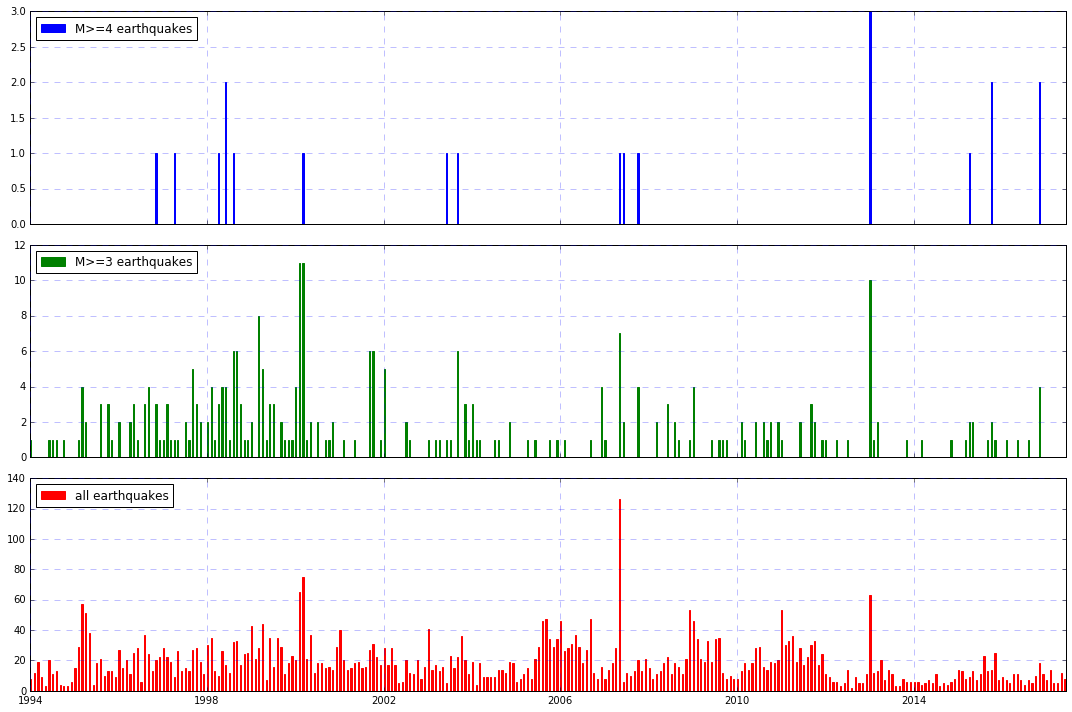

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(15,10))

mcount = eqs50m4.resample('1M', label='left', closed='left').count()
ax1.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax1.bar(mcount.index, mcount.publicid, width = 10, color='blue', edgecolor='blue', align='edge', label='M>=4 earthquakes')
ax1.legend(loc='upper left')
mcount = eqs50m3.resample('1M', label='left', closed='left').count()
ax2.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax2.bar(mcount.index, mcount.publicid, width = 10, color='green', edgecolor='green', align='edge', label='M>=3 earthquakes')
ax2.legend(loc='upper left')
mcount = eqs50.resample('1M', label='left', closed='left').count()
ax3.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax3.bar(mcount.index, mcount.publicid, width = 10, color='red', edgecolor='red', align='edge', label='all earthquakes')
ax3.legend(loc='upper left')
plt.tight_layout()
fig.savefig('taranaki_monthly.png', dpi=200)

**Cumulative number**

Make a column containing event number (should be a better way of doing this)

In [42]:
eqs50.sort_index(ascending=True, inplace=True)
eqs50.reset_index(inplace=True)
eqs50['evnum'] = eqs50.index+1
eqs50.set_index('origintime', inplace=True, drop=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#cumulative number maximum
nmax = eqs50['evnum'].iloc[-1]
#tmin = eqs50.index[1]
#tmax = eqs50.index[-1]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

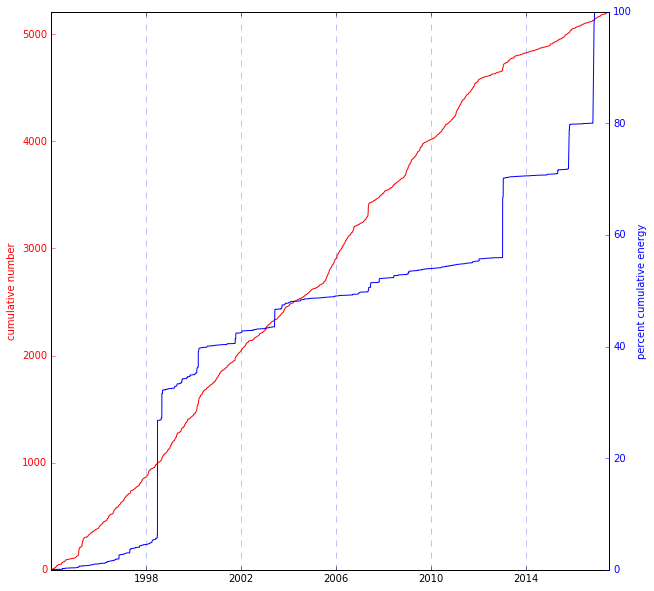

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(eqs50['evnum'], color='red')
ax.set_ylim([0,nmax])
ax.tick_params(axis='y', colors='red')
ax.set_ylabel('cumulative number', color = 'red')
ax.xaxis.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)

ax2= ax.twinx()
eqs50['energy'] = pow(10,(1.44 * eqs50[' magnitude'] + 5.24))
eqs50['cumeng'] = eqs50['energy'].cumsum()
eqs50['cumeng'] = 100 * eqs50['cumeng'] / eqs50['cumeng'].max()
ax2.plot(eqs50['cumeng'], color='blue', marker='None')
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('percent cumulative energy', color = 'blue')
fig.savefig('taranaki_cumulative.png', dpi=200)

**Cross section, for current year**

**And data output for plotting**

In [45]:
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startyear+'&enddate='+end

In [46]:
eqs = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')
eqs.to_csv('eqs_year.csv', index=False)

In [47]:
#select eqs in depth range and latitude range
eqs50 = eqs[eqs[' depth']<50]
eqs50.to_csv('eqs50_year.csv', index=False)
sect = eqs50[(eqs50[' latitude']>-39.4167)&(eqs50[' latitude']<-39.0833)]

In [48]:
#read topography profile file, convert to km
names=['longitude', 'elevation']
topo = pd.read_csv('taranaki_cross_section.xy', sep='\s+', names=names, usecols=[0,2], index_col=False)
topo['elevation'] = (topo['elevation'] / -1000)

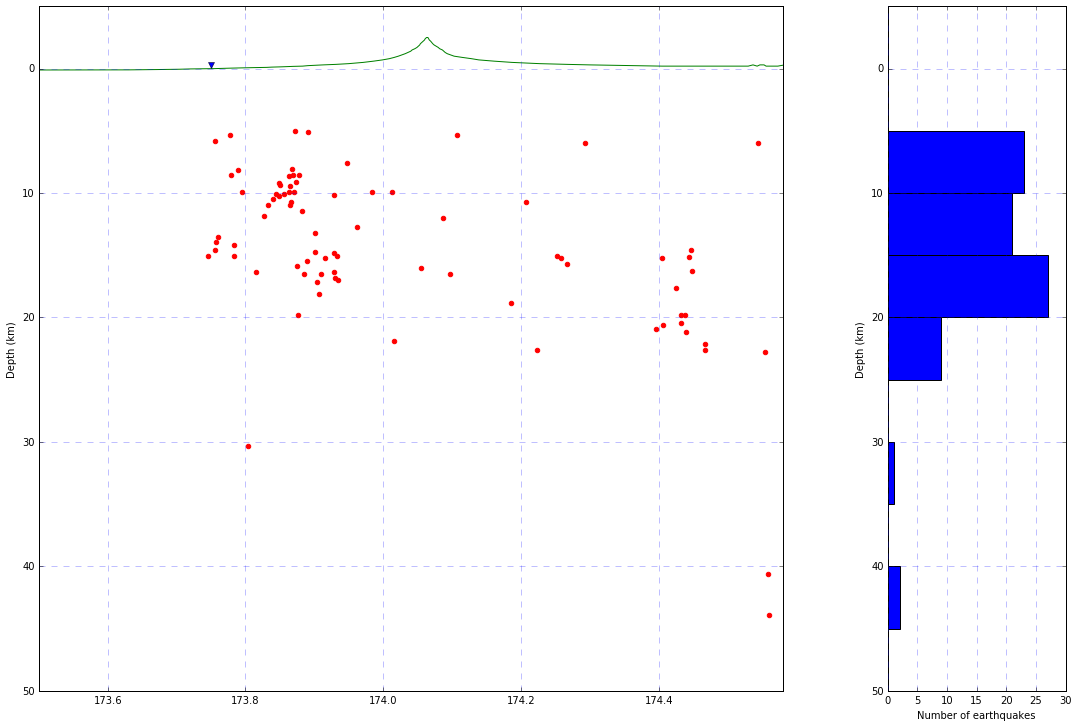

In [49]:
#hypocentres and topography on one plot, depth histogram on another
fig = plt.figure(figsize=(15,10))
gridspec.GridSpec(3,11)

#hypocentres and topography
plt.subplot2grid((3,11), (0,0), colspan=8, rowspan=3)
plt.plot(topo['longitude'], topo['elevation'], color='green')
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
plt.scatter(x=sect['longitude'], y=sect[' depth'], color='red')
plt.xlim([173.5,174.58])
plt.ylim([-5,50])
plt.ylabel('Depth (km)')
plt.plot(173.75, -0.3, marker='v', color='blue') #inverted triangle at coast
plt.gca().invert_yaxis()
plt.tight_layout()

#depth histogram
plt.subplot2grid((3,11), (0,9), colspan=2, rowspan=3)
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
plt.hist(sect[' depth'], bins=[0,5,10,15,20,25,30,35,40,45], orientation='horizontal')
plt.ylim([-5,50])
plt.xlabel('Number of earthquakes')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()

fig.savefig('taranaki_depth-profile_histogram.png', dpi=200)

**Hypocentres for North Island GoogleEarth plot**

In [50]:
#box for search area
bbox = '172.6,-40.5,177.3,-38.1'
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startyear+'&enddate='+end

eqs = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')
eqs.to_csv('eqs_wide.csv', index=False)

**Geodetic Plots - enu for each site, all data and reporting year**

In [51]:
od = 11 #filter kernel

names = ['dt', 'obs', 'err']

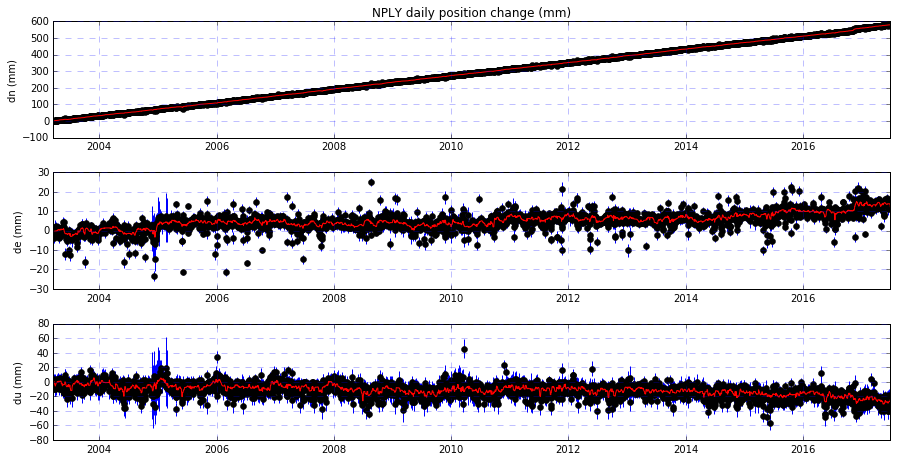

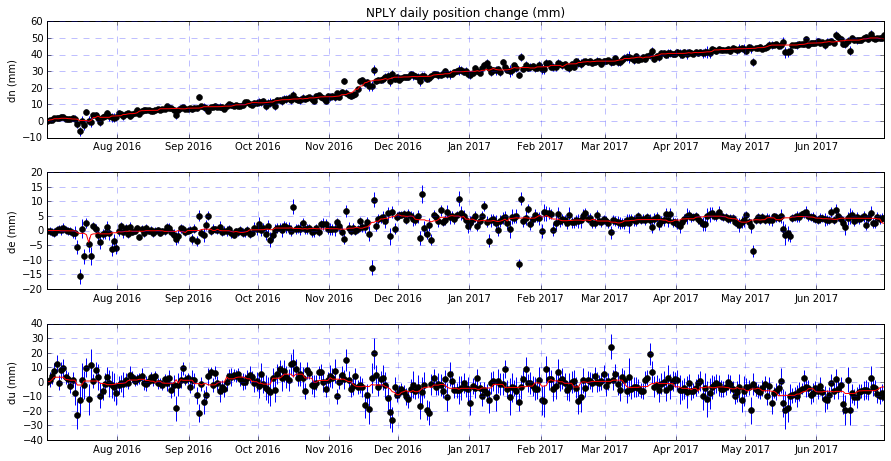

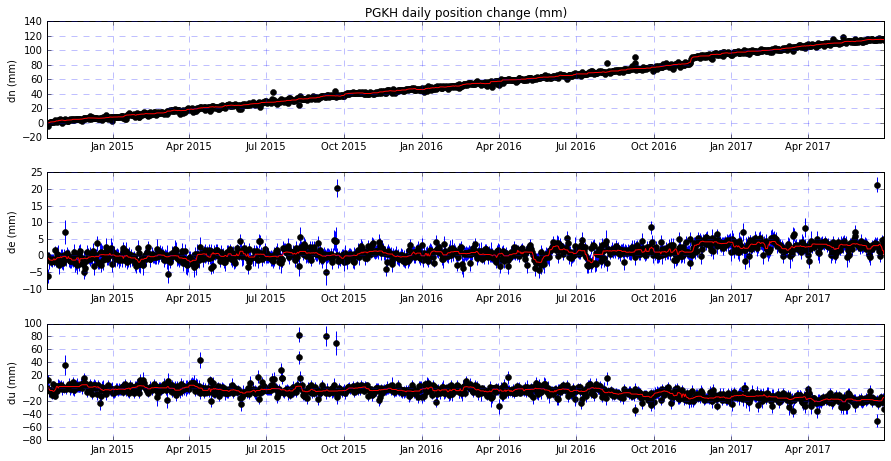

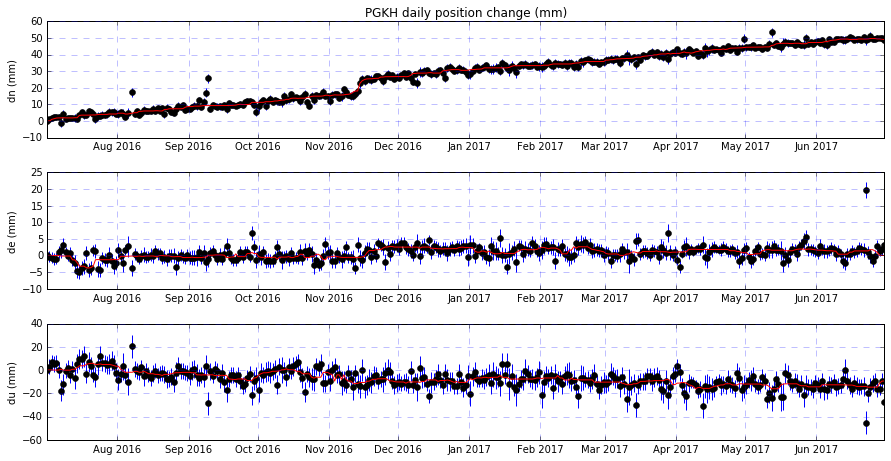

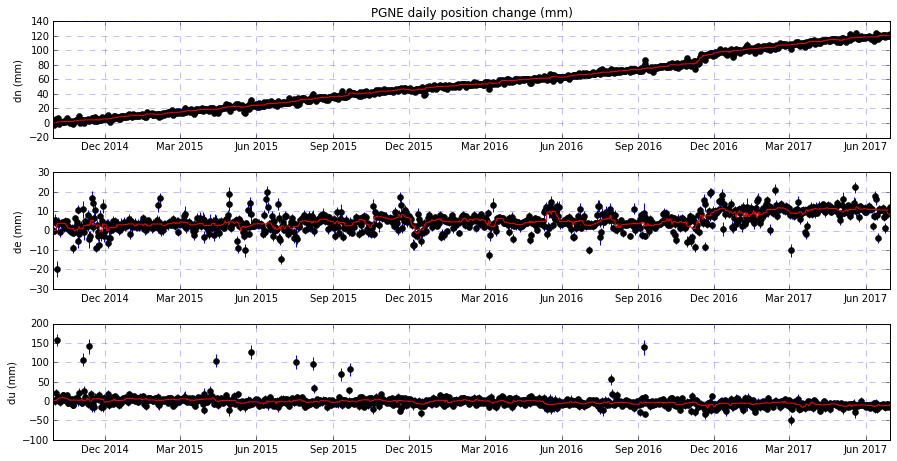

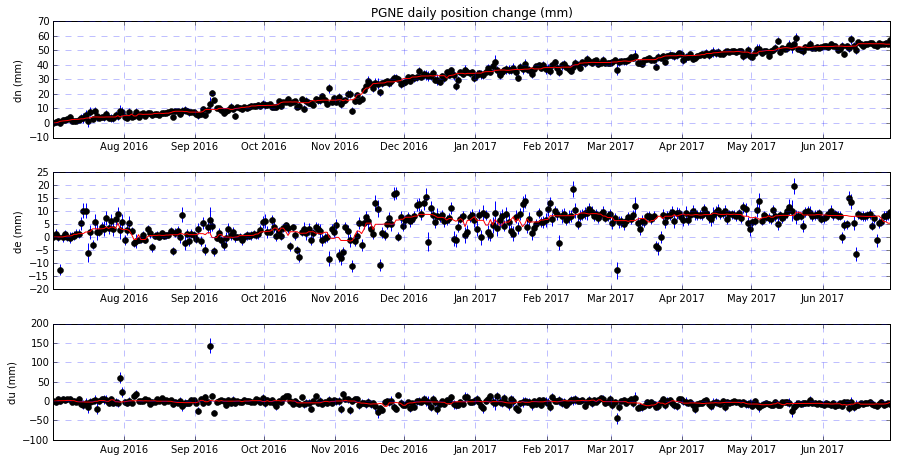

In [52]:
#loop for each site
sites = ['NPLY.LI', 'PGKH.CG', 'PGNE.CG']
for site in sites:
  siteid = str.split(site, '.')[0]
  netid = str.split(site, '.')[1]
  
  url= 'http://fits.geonet.org.nz/observation?typeID=e&siteID='+siteid+'&networkID='+netid
  dfe = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})
  url= 'http://fits.geonet.org.nz/observation?typeID=n&siteID='+siteid+'&networkID='+netid
  dfn = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})
  url= 'http://fits.geonet.org.nz/observation?typeID=u&siteID='+siteid+'&networkID='+netid
  dfu = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})

  #only data up to end date (end of reporting period)
  dfe = dfe[dfe['Datetime']<end]
  dfn = dfn[dfn['Datetime']<end]
  dfu = dfu[dfu['Datetime']<end]

  #join dataframes, rename columns
  df = pd.concat([dfe, dfn, dfu], axis=1, join='inner')
  names2 = ['Datetime', 'obse', 'erre', 'dtn', 'obsn', 'errn', 'dtu', 'obsu', 'erru']
  df.columns = names2      #rename columns

  #reference observation columns to first value
  df['obse'] -= df['obse'][0]
  df['obsn'] -= df['obsn'][0]
  df['obsu'] -= df['obsu'][0]

  #pre-filter observations
  df['obsef'] = scipy.signal.medfilt(df['obse'],od)
  df['obsnf'] = scipy.signal.medfilt(df['obsn'],od)
  df['obsuf'] = scipy.signal.medfilt(df['obsu'],od)

  #ticks
  majorTick = mpl.dates.YearLocator(1)
  majorFormat = mpl.dates.DateFormatter('%Y')
  minorTick = mpl.dates.MonthLocator()

  #plot all data
  fig = plt.figure(figsize=(15, 7.5))
  fig.subplots_adjust(hspace=0.3)

  ax = fig.add_subplot(3, 1, 1)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsn'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsn'], yerr=df['errn'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsnf'], marker='None', color='red')
  plt.ylabel('dn (mm)')
  title = (siteid+' daily position change (mm)')
  plt.title(title)

  ax = fig.add_subplot(3, 1, 2)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obse'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obse'], yerr=df['erre'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsef'], marker='None', color='red')
  plt.ylabel('de (mm)')

  ax = fig.add_subplot(3, 1, 3)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsu'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsu'], yerr=df['erru'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsuf'], marker='None', color='red')
  plt.ylabel('du (mm)')

  fig.savefig('taranaki_'+siteid+'_all.png', dpi=200)

  #only data for reporting period
  dfe = dfe[(dfe['Datetime']<end)&(dfe['Datetime']>=startyear)]
  dfn = dfn[(dfn['Datetime']<end)&(dfn['Datetime']>=startyear)]
  dfu = dfu[(dfu['Datetime']<end)&(dfu['Datetime']>=startyear)]

  #join dataframes, rename columns
  df = pd.concat([dfe, dfn, dfu], axis=1, join='inner')
  names2 = ['Datetime', 'obse', 'erre', 'dtn', 'obsn', 'errn', 'dtu', 'obsu', 'erru']
  df.columns = names2      #rename columns

  #reference observation columns to first value
  df.reset_index(inplace=True)
  df['obse'] -= df['obse'][0]
  df['obsn'] -= df['obsn'][0]
  df['obsu'] -= df['obsu'][0]

  #pre-filter observations
  df['obsef'] = scipy.signal.medfilt(df['obse'],od)
  df['obsnf'] = scipy.signal.medfilt(df['obsn'],od)
  df['obsuf'] = scipy.signal.medfilt(df['obsu'],od)

  #ticks
  majorTick = mpl.dates.YearLocator(1)
  majorFormat = mpl.dates.DateFormatter('%Y')
  minorTick = mpl.dates.MonthLocator()

  #plot all data
  fig = plt.figure(figsize=(15, 7.5))
  fig.subplots_adjust(hspace=0.3)

  ax = fig.add_subplot(3, 1, 1)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsn'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsn'], yerr=df['errn'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsnf'], marker='None', color='red')
  plt.ylabel('dn (mm)')
  title = (siteid+' daily position change (mm)')
  plt.title(title)

  ax = fig.add_subplot(3, 1, 2)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obse'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obse'], yerr=df['erre'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsef'], marker='None', color='red')
  plt.ylabel('de (mm)')

  ax = fig.add_subplot(3, 1, 3)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsu'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsu'], yerr=df['erru'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsuf'], marker='None', color='red')
  plt.ylabel('du (mm)')

  fig.savefig('taranaki_'+siteid+'_year.png', dpi=200)